In [8]:
import pandas as pd
from collections import defaultdict

In [7]:
annotations = pd.read_csv("./annotations.csv")[
    ["which_makes_more_sense", "an1", "an2"]
].to_dict("records")
annotations[:5]

[{'which_makes_more_sense': 2,
  'an1': 'terrorist room',
  'an2': 'corporate repayment'},
 {'which_makes_more_sense': 2,
  'an1': 'terrorist room',
  'an2': 'corporate repayment'},
 {'which_makes_more_sense': 1,
  'an1': 'adjacent flash',
  'an2': 'parliamentary harvest'},
 {'which_makes_more_sense': 1,
  'an1': 'adjacent flash',
  'an2': 'parliamentary harvest'},
 {'which_makes_more_sense': 1,
  'an1': 'eligible co-ordinator',
  'an2': 'international prince'}]

In [13]:
total_occ = defaultdict(int)
preferred_occ = defaultdict(int)

for a in annotations:
    total_occ[a["an1"]] += 1
    total_occ[a["an2"]] += 1
    preferred_occ[a[f"an{a['which_makes_more_sense']}"]] += 1

scores = {k: preferred_occ[k] / total_occ[k] for k in total_occ}
scores = pd.DataFrame(scores.items(), columns=["item", "score"])
# for each row in scores, also add column values for total_occ and preferred_occ
scores = scores.assign(
    total_occ=scores["item"].map(total_occ),
    preferred_occ=scores["item"].map(preferred_occ),
)
scores

,item,score,total_occ,preferred_occ
0,terrorist room,0.333333,9,3
1,corporate repayment,1.000000,11,11
2,adjacent flash,0.500000,12,6
3,parliamentary harvest,0.200000,10,2
4,eligible co-ordinator,0.700000,10,7
...,...,...,...,...
27515,combined pulse,0.444444,9,4
27516,Chinese eligibility,0.777778,9,7
27517,linear harbour,0.625000,8,5
27518,slight socialism,1.000000,6,6


In [18]:
scores.sort_values("score", ascending=False).sample(10)

,item,score,total_occ,preferred_occ
8555,electoral mind,0.300000,10,3
5734,equal petition,0.900000,10,9
16778,selected aftermath,0.200000,10,2
2089,structural individual,0.300000,10,3
26164,environmental wake,0.444444,9,4
4625,guilty shadow,0.444444,9,4
19073,intensive novel,0.666667,9,6
15999,amazing manufacture,0.700000,10,7
25991,surprising sandwich,0.600000,10,6
3003,back multitude,0.100000,10,1


### Attempt replicating some stuff from Vecchi:
![](https://i.imgur.com/NgVCPjJ.png)

<AxesSubplot:title={'center':'Distribution of composite acceptability scores'}, ylabel='Frequency'>

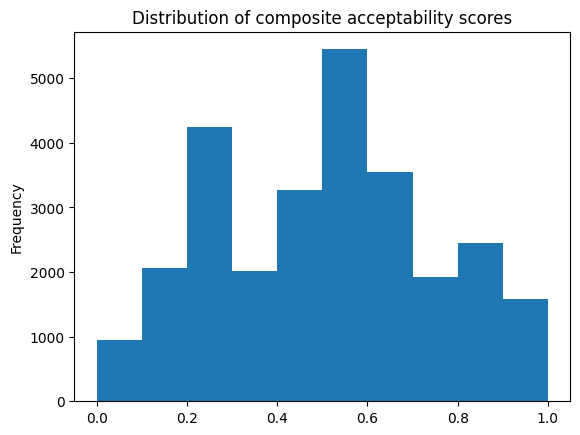

In [27]:
scores.score.plot.hist(bins=10, title="Distribution of composite acceptability scores")

In [28]:
scores.to_csv("./vecchi-scores.csv", index=False)